In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel("/Users/dinhngoccan/Desktop/desktop/mô hình tín dụng R/data after.xlsx")

In [2]:
target = ['khả năng trả nợ']
features = ['Mục đích vay', 'Thu nhập ',\
            'Số tiền sổ tiết kiệm','Hôn nhân','Tài sản thế chấp','Chứng minh thu nhập']

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [4]:
def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

In [5]:
X = data[features].values
y = data[target].values

n_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=n_state)

In [6]:
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, y_train.ravel())

y_pred = RF_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Random Forest accuracy: ', accuracy_score(y_test, y_pred))

[[263  13]
 [ 24 300]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       276
           1       0.96      0.93      0.94       324

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600

Random Forest accuracy:  0.9383333333333334


In [7]:
importance_rf = RF_classifier.feature_importances_
features_importances_rf = pd.DataFrame({'FeatureName': data.loc[:,features].columns, 'Random Forest Feature Importance': importance_rf})
features_importances_rf.sort_values(by=['Random Forest Feature Importance'], ascending=False)

,FeatureName,Random Forest Feature Importance
2,Số tiền sổ tiết kiệm,0.725994
1,Thu nhập,0.158392
0,Mục đích vay,0.055453
4,Tài sản thế chấp,0.030459
3,Hôn nhân,0.019338
5,Chứng minh thu nhập,0.010365


<Axes: ylabel='FeatureName'>

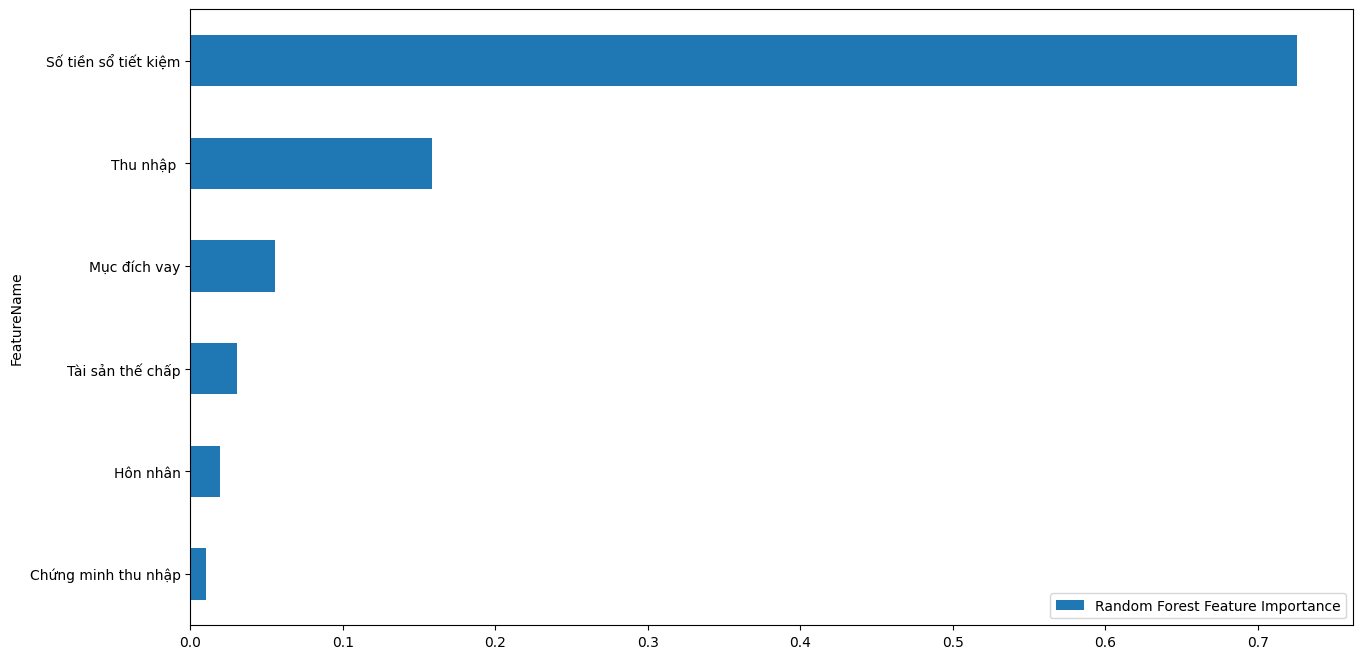

In [8]:
features_importances_rf.sort_values("Random Forest Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Random Forest Feature Importance"], kind="barh")

/var/folders/6y/ng3thm253779cslcjdsw4x1w0000gn/T/ipykernel_28953/1662587078.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
/var/folders/6y/ng3thm253779cslcjdsw4x1w0000gn/T/ipykernel_28953/1662587078.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


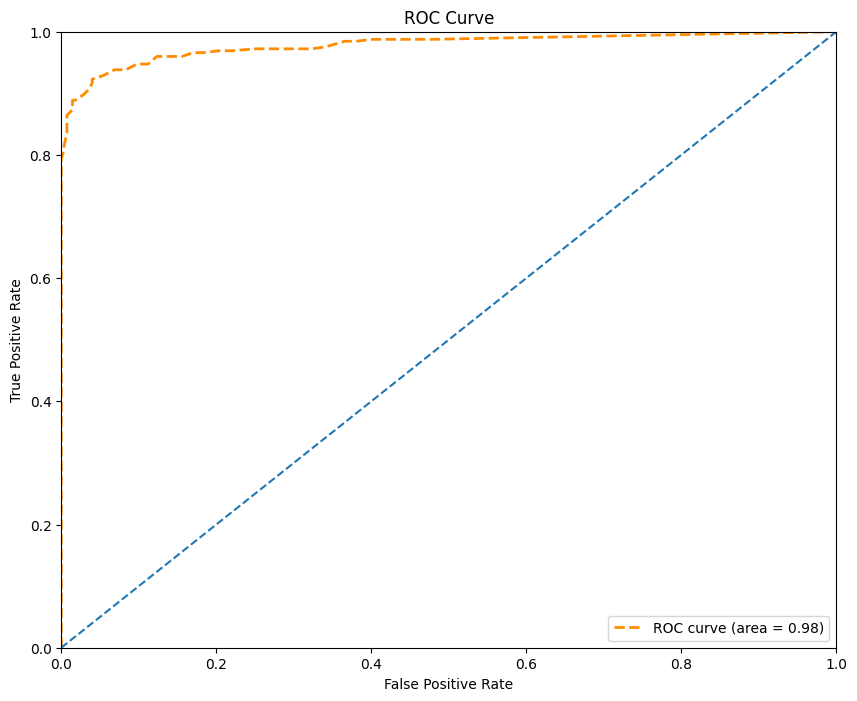

In [9]:
y_pred_prob_test = RF_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)